<a href="https://colab.research.google.com/github/lhcbernardes/fiap-ia/blob/main/desaio_aula_inaugural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importar as bibliotecas necessárias - pandas, sklearn, matplotlib, seaborn
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score

In [ ]:
# importar a base de dados
url = "https://raw.githubusercontent.com/pnferreira/fiap-ia-devs/main/dropout-inaugural.csv"
df = pd.read_csv(url)

In [ ]:
# visualizar as primeiras linhas da base de dados
print(df.head())

   Marital status  Application mode  Application order  Course  \
0             1.0                 8                  5     2.0   
1             1.0                 6                  1    11.0   
2             1.0                 1                  5     5.0   
3             1.0                 8                  2    15.0   
4             2.0                12                  1     3.0   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                    13.0                    10.0                    6  ...   
1                     1.

In [ ]:
# visualizar as informações da base de dados
print(df.head())

   Marital status  Application mode  Application order  Course  \
0             1.0                 8                  5     2.0   
1             1.0                 6                  1    11.0   
2             1.0                 1                  5     5.0   
3             1.0                 8                  2    15.0   
4             2.0                12                  1     3.0   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                    13.0                    10.0                    6  ...   
1                     1.

In [ ]:
# ver os valores da coluna Target - que queremos prever
print(df['Target'].value_counts())
print(f"Percentual: {(df['Target'].value_counts(normalize=True).round(4) * 100)}%")

Target
Graduate    2212
Dropout     1423
Name: count, dtype: int64
Percentual: Target
Graduate    60.85
Dropout     39.15
Name: proportion, dtype: float64%


In [ ]:
# tratar dados nulos
# outras formas de pré-processamento (OPCIONAL - ex.: seleção de características, normalização, tratamento de outliers, balanceamento do target...)
# pode ser nessa célula ou nas seguintes, a depender do que você escolher fazer
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())
        if df.duplicated().sum() > 0:
           df = df.drop_duplicates()


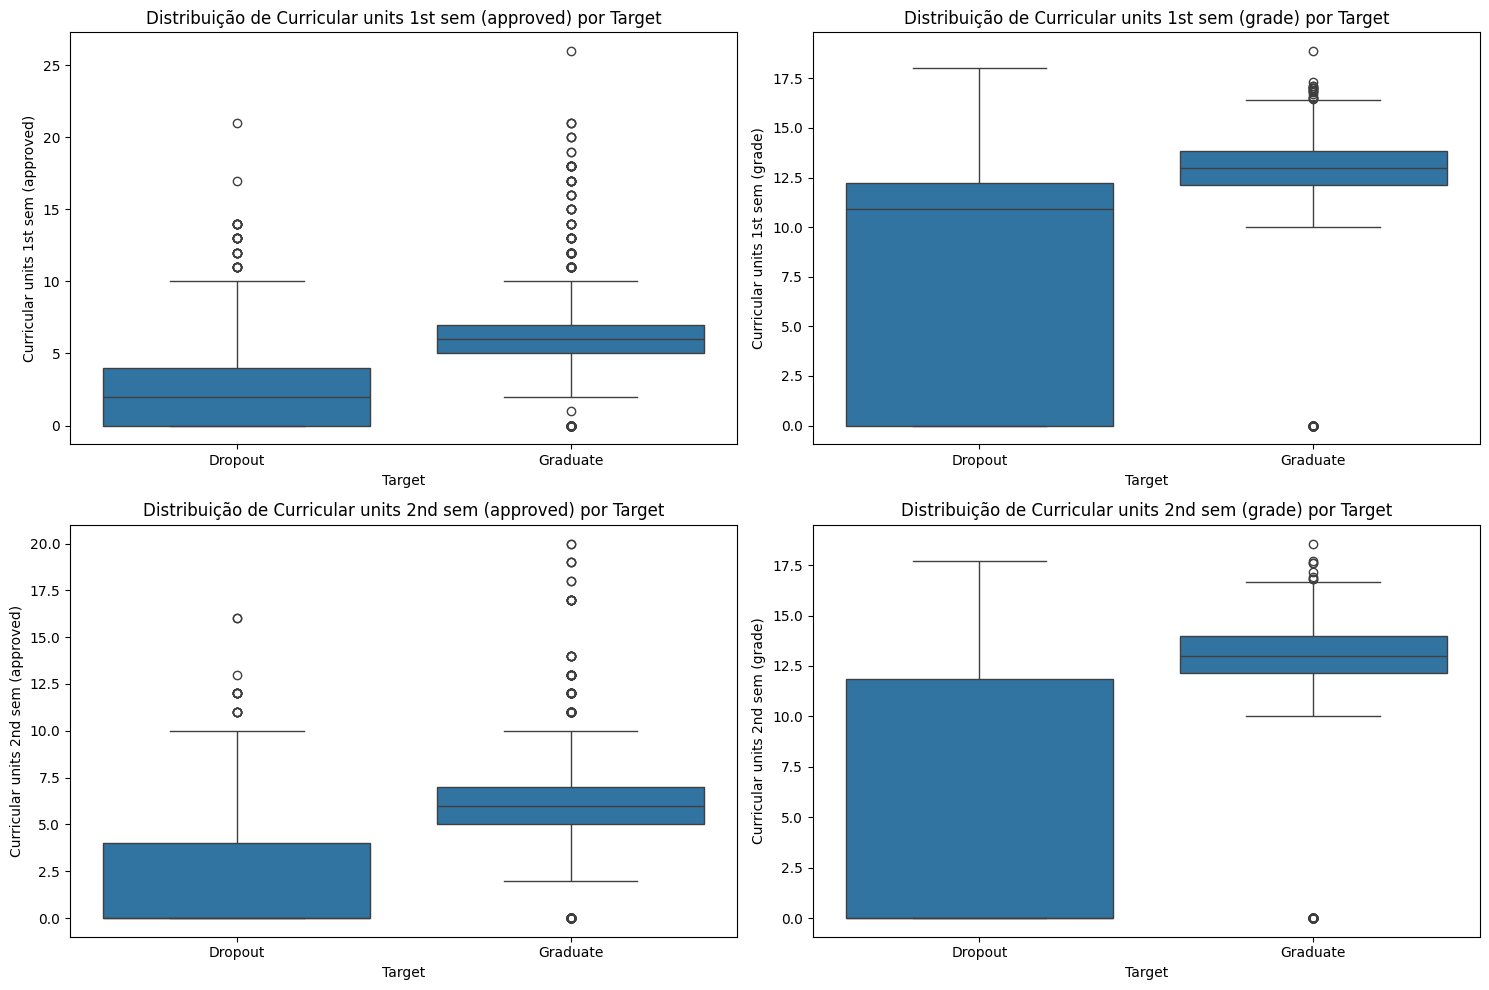

In [ ]:
# análise exploratória: crie uma pergunta sobre a base de dados e responda através de um gráfico
# Pergunta: Quais são as características mais correlacionadas com o abandono escolar?
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Curricular units 1st sem (approved)',
                         'Curricular units 1st sem (grade)',
                         'Curricular units 2nd sem (approved)',
                         'Curricular units 2nd sem (grade)'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Target', y=col, data=df)
    plt.title(f'Distribuição de {col} por Target')
plt.tight_layout()

In [ ]:
# divisão entre caracterísiticas (X) e rótulo (y)
X = df.drop('Target', axis=1)
y = df['Target']
# divisão entre treino e teste - 70% e 30%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
# treinamento de modelo de classificação a sua escolha (um ou mais)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), X.columns)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=2,
        class_weight='balanced',
        random_state=42
    ))
])


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall_dropout = recall_score(y_test, y_pred, pos_label='Dropout')

In [ ]:
# avaliação do modelo com dados de teste
print(classification_report(y_test, y_pred))
#(para ser considerado resultado satisfatório, você deve alcançar no mínimo 90% de acurácia e 80% de recall do Dropout)
meets_requirements = accuracy >= 0.9 and recall_dropout >= 0.8
print(f"\nO modelo atende aos requisitos (acurácia >= 90% e recall do dropout >= 80%)? {'Sim' if meets_requirements else 'Não'}")


              precision    recall  f1-score   support

     Dropout       0.94      0.81      0.87       426
    Graduate       0.89      0.97      0.93       663

    accuracy                           0.91      1089
   macro avg       0.92      0.89      0.90      1089
weighted avg       0.91      0.91      0.91      1089


O modelo atende aos requisitos (acurácia >= 90% e recall do dropout >= 80%)? Sim
